In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns 
import warnings
from category_encoders.target_encoder import TargetEncoder
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV,StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [2]:
#importing the database 
df= pd.read_csv("all_data.csv")

In [3]:

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


# Data preprocessing 
# removing null values 
# removing duplicate values
# feature engineering 

In [5]:
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [6]:
df.duplicated().sum()

1162

In [7]:
df = df.drop_duplicates()

In [8]:
df.duplicated().sum()

0

In [9]:
df = df.dropna()

In [10]:
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [11]:
df.shape

(185687, 6)

In [12]:
df['Purchase Address'].values

array(['359 Spruce St, Seattle, WA 98101',
       '492 Ridge St, Dallas, TX 75001', '149 7th St, Portland, OR 97035',
       ..., '273 Wilson St, Seattle, WA 98101',
       '778 River St, Dallas, TX 75001',
       '747 Chestnut St, Los Angeles, CA 90001'], dtype=object)

In [13]:
# convert the data
df['Quantity Ordered'].unique()

array(['2', '1', '3', '4', 'Quantity Ordered', '6', '7', '5', '8', '9'],
      dtype=object)

In [14]:
df['Quantity Ordered'].sum()

'2112211111111111111111111111121111131211112111211111121131111111111211111111111211111111111111111111121111122111111121111112111141121111141111111111211111121111111111111111111111111131111111131111211111111111111Quantity Ordered1112111111111111111111111111211112411111111121112111112111111111111121131211111211111111111121111211121111111111111121111132111111111111111111111111112221111111111111131111111112111111111111111111111111111111111111111111111222131111111111111111111111612111111111111111711111111111112111111111111111111111211111111111111311111111311111111112111111111111121311111111111111211111111111111111111111111111111111121211111111111111111111111112311111111111111111211111111111111111111111111111111112111111111111111231111111111111111111111211111111111111111111111111121111111111111111111121112111111111112111111112111111111211111231111131211111111111114111121111211111111111211111211111111111111111111111211111112111111111111111111211111111111111111111121115111111111111111111111111

In [15]:
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [16]:
df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [17]:
df.rename(columns={'Quantity Ordered' :'ordered','Price Each': 'price'},inplace=True)

In [18]:
df.head()

,Order ID,Product,ordered,price,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"


In [19]:
df['ordered'].unique()

array(['2', '1', '3', '4', 'Quantity Ordered', '6', '7', '5', '8', '9'],
      dtype=object)

In [20]:
df['ordered']=pd.to_numeric(df['ordered'],errors= 'coerce')

In [21]:
df['ordered'].unique()

array([ 2.,  1.,  3.,  4., nan,  6.,  7.,  5.,  8.,  9.])

In [22]:
df['ordered'].isnull().sum()

1

In [23]:
df['price'].unique()

array(['11.99', '99.99', '700.0', '3.84', '379.99', '109.99', '1700.0',
       '600.0', '149.99', '14.95', '150.0', '2.99', '11.95', '389.99',
       '999.99', '300.0', '400.0', 'Price Each', '600', '150', '1700',
       '300', '400', '700'], dtype=object)

In [24]:
df['price']=pd.to_numeric(df['price'],errors= 'coerce')

In [25]:
df['price'].unique()

array([  11.99,   99.99,  700.  ,    3.84,  379.99,  109.99, 1700.  ,
        600.  ,  149.99,   14.95,  150.  ,    2.99,   11.95,  389.99,
        999.99,  300.  ,  400.  ,     nan])

In [26]:
df['price'].isnull().sum()

1

In [27]:
df.isnull().sum()

Order ID            0
Product             0
ordered             1
price               1
Order Date          0
Purchase Address    0
dtype: int64

In [28]:
df = df.dropna()

In [29]:
df.isnull().sum()

Order ID            0
Product             0
ordered             0
price               0
Order Date          0
Purchase Address    0
dtype: int64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185686 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185686 non-null  object 
 1   Product           185686 non-null  object 
 2   ordered           185686 non-null  float64
 3   price             185686 non-null  float64
 4   Order Date        185686 non-null  object 
 5   Purchase Address  185686 non-null  object 
dtypes: float64(2), object(4)
memory usage: 9.9+ MB


In [31]:
df['ordered'].unique()

array([2., 1., 3., 4., 6., 7., 5., 8., 9.])

In [32]:
df['Purchase Address']=df['Purchase Address'].str.replace("," ,"")

In [33]:
df['Purchase Address']=df['Purchase Address'].apply(lambda x :x.split()[3 : 4] )

In [34]:
df['Purchase Address']=df['Purchase Address'].apply(lambda x:x[0])

In [35]:
df.head()

,Order ID,Product,ordered,price,Order Date,Purchase Address
0,236670,Wired Headphones,2.0,11.99,08/31/19 22:21,Seattle
1,236671,Bose SoundSport Headphones,1.0,99.99,08/15/19 15:11,Dallas
2,236672,iPhone,1.0,700.00,08/06/19 14:40,Portland
3,236673,AA Batteries (4-pack),2.0,3.84,08/29/19 20:59,Los
4,236674,AA Batteries (4-pack),2.0,3.84,08/15/19 19:53,New


In [36]:
df['Year'] = pd.to_datetime(df['Order Date']).dt.year
df['Month'] = pd.to_datetime(df['Order Date']).dt.month
df['Hour'] = pd.to_datetime(df['Order Date']).dt.hour
df['Minute'] = pd.to_datetime(df['Order Date']).dt.minute


In [37]:
df.head()

,Order ID,Product,ordered,price,Order Date,Purchase Address,Year,Month,Hour,Minute
0,236670,Wired Headphones,2.0,11.99,08/31/19 22:21,Seattle,2019,8,22,21
1,236671,Bose SoundSport Headphones,1.0,99.99,08/15/19 15:11,Dallas,2019,8,15,11
2,236672,iPhone,1.0,700.00,08/06/19 14:40,Portland,2019,8,14,40
3,236673,AA Batteries (4-pack),2.0,3.84,08/29/19 20:59,Los,2019,8,20,59
4,236674,AA Batteries (4-pack),2.0,3.84,08/15/19 19:53,New,2019,8,19,53


In [38]:
df['sale']= df['ordered']*df['price']

In [39]:
df.head()

,Order ID,Product,ordered,price,Order Date,Purchase Address,Year,Month,Hour,Minute,sale
0,236670,Wired Headphones,2.0,11.99,08/31/19 22:21,Seattle,2019,8,22,21,23.98
1,236671,Bose SoundSport Headphones,1.0,99.99,08/15/19 15:11,Dallas,2019,8,15,11,99.99
2,236672,iPhone,1.0,700.00,08/06/19 14:40,Portland,2019,8,14,40,700.00
3,236673,AA Batteries (4-pack),2.0,3.84,08/29/19 20:59,Los,2019,8,20,59,7.68
4,236674,AA Batteries (4-pack),2.0,3.84,08/15/19 19:53,New,2019,8,19,53,7.68


In [40]:
sales_df= df[['Product','Year','Month','Hour','Minute','sale']]

In [41]:
sales_df

,Product,Year,Month,Hour,Minute,sale
0,Wired Headphones,2019,8,22,21,23.98
1,Bose SoundSport Headphones,2019,8,15,11,99.99
2,iPhone,2019,8,14,40,700.00
3,AA Batteries (4-pack),2019,8,20,59,7.68
4,AA Batteries (4-pack),2019,8,19,53,7.68
...,...,...,...,...,...,...
186845,Lightning Charging Cable,2019,12,20,58,14.95
186846,AA Batteries (4-pack),2019,12,12,1,7.68
186847,Vareebadd Phone,2019,12,6,43,400.00
186848,Wired Headphones,2019,12,10,39,11.99


# EDA

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


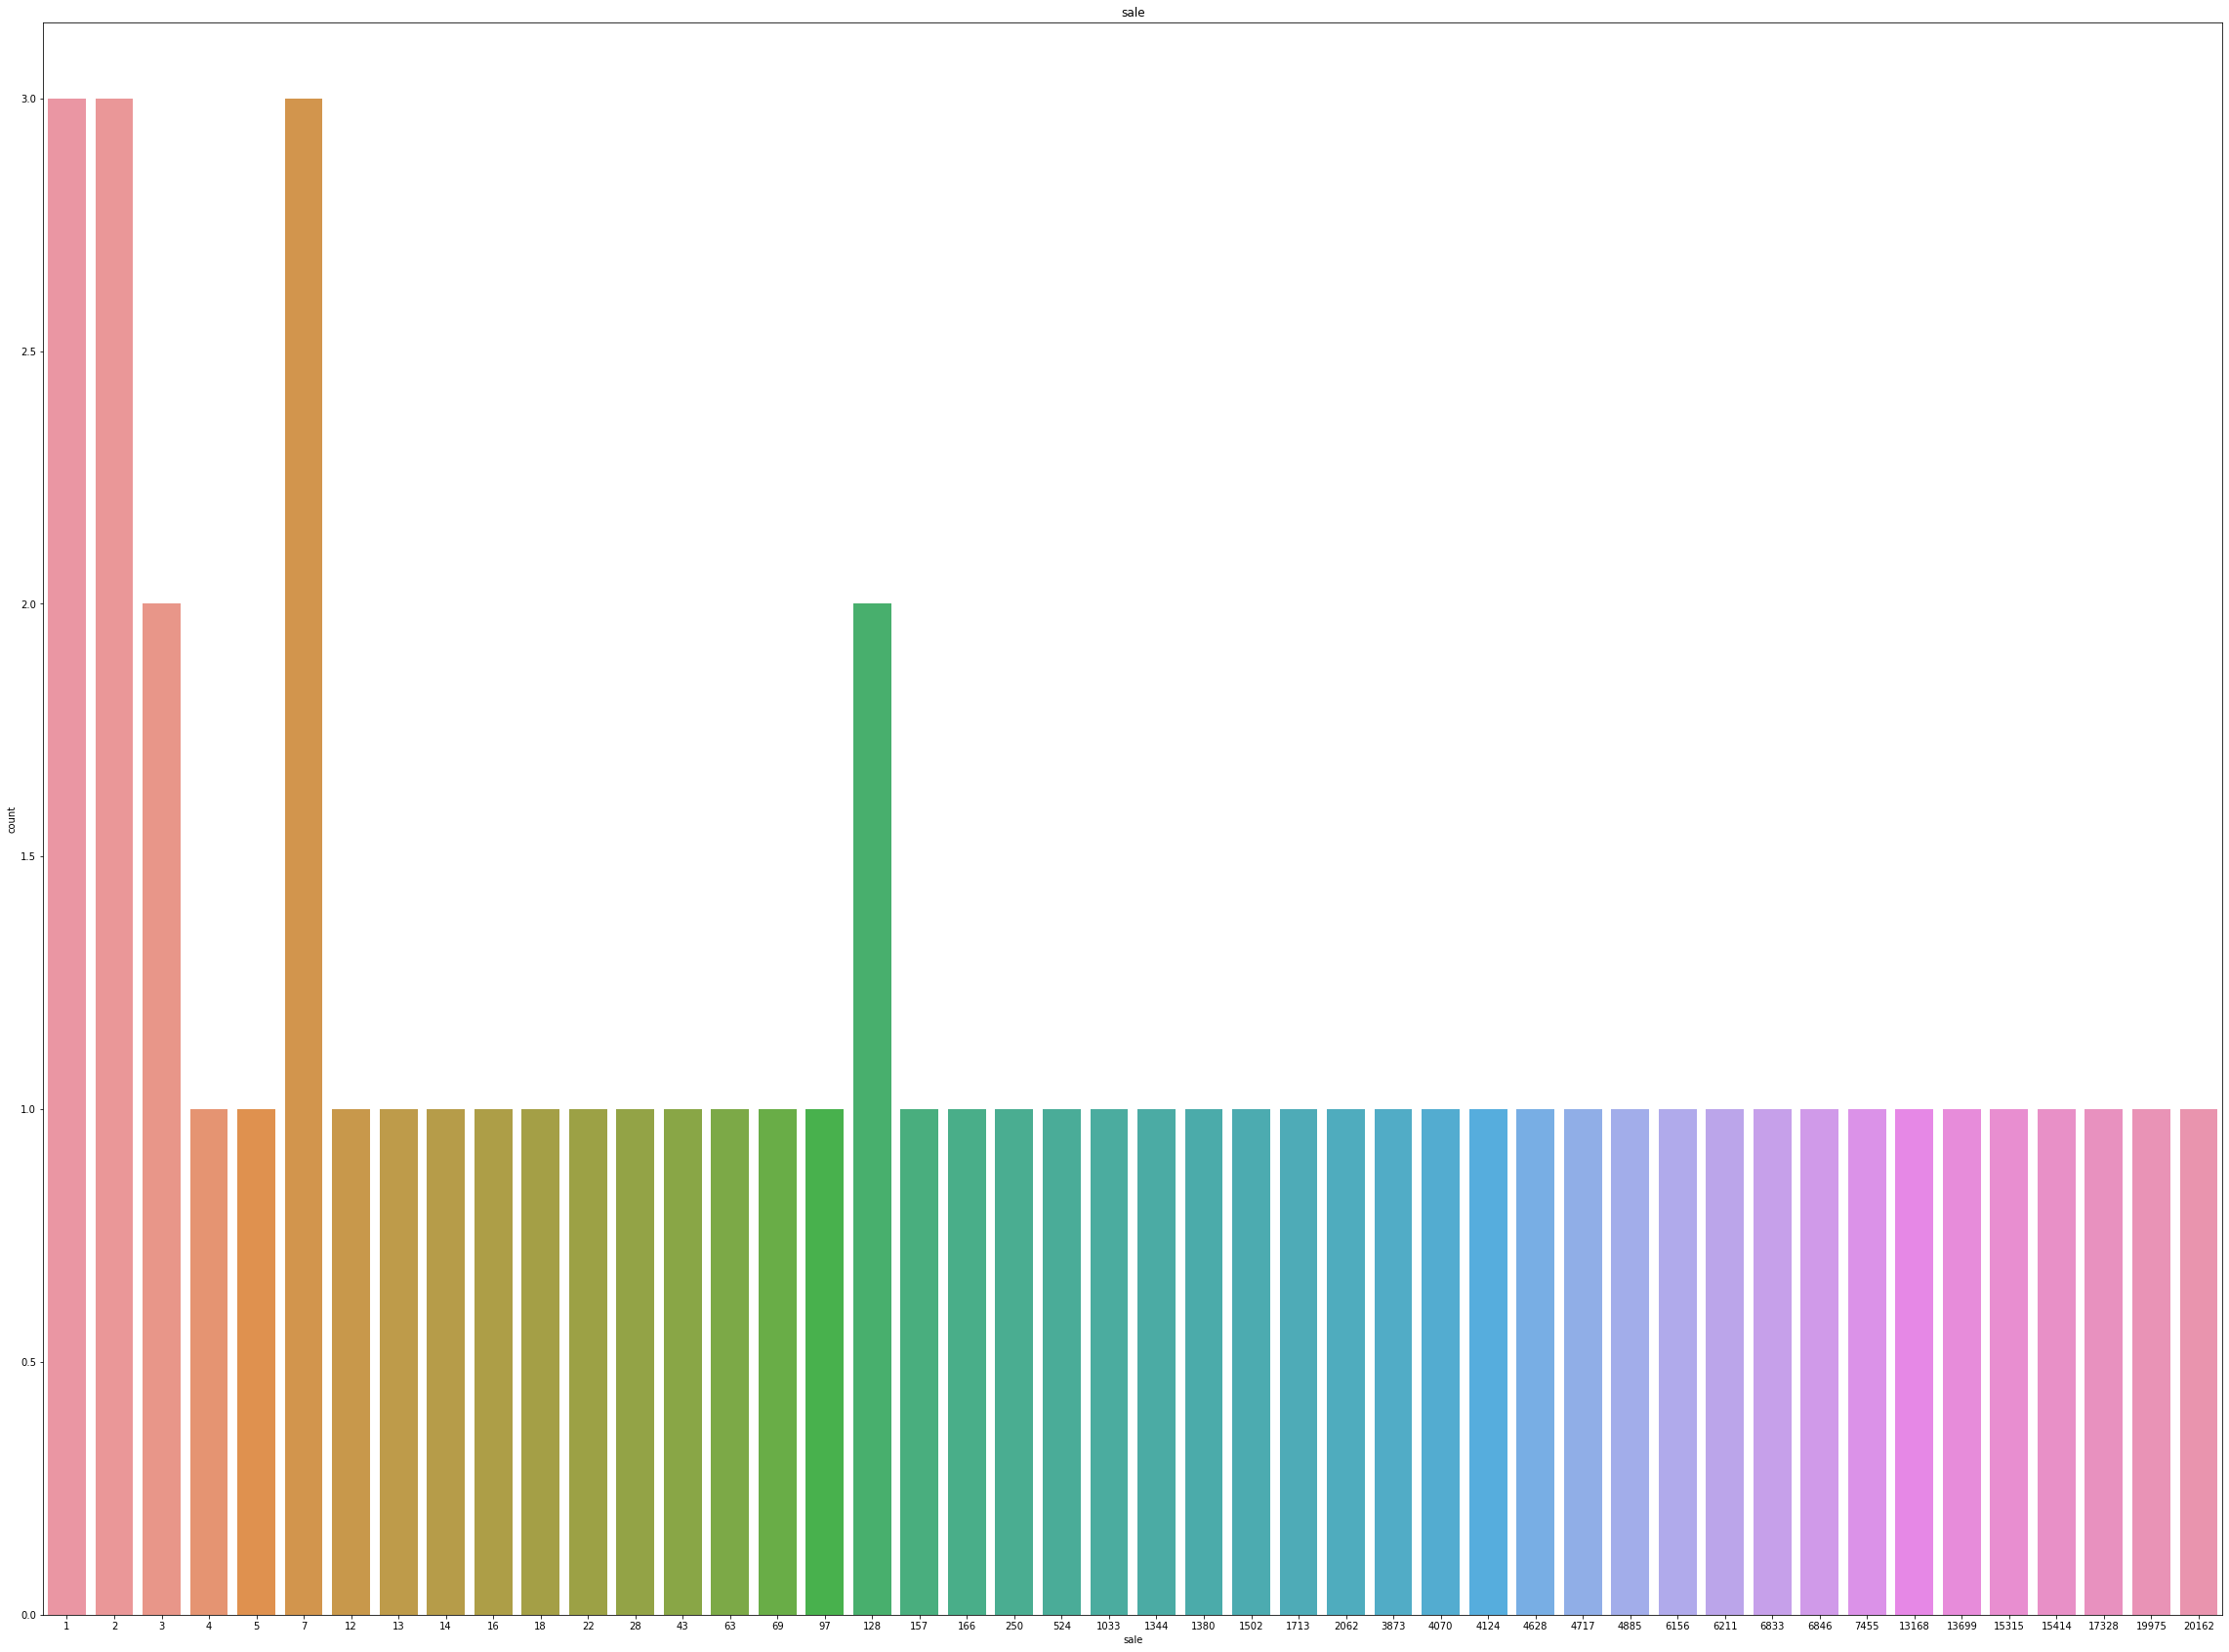

In [42]:
plt.figure(figsize=(40,30))
sns.countplot(sales_df['sale'].value_counts())
plt.title('sale')
plt.show()

<AxesSubplot:xlabel='Year', ylabel='sale'>

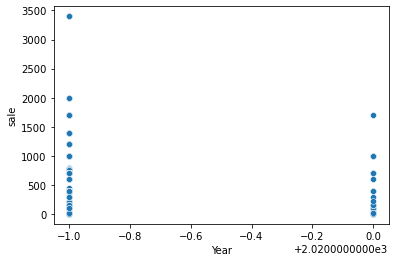

In [43]:
sns.scatterplot(x='Year',y='sale',data=sales_df)

<AxesSubplot:xlabel='sale', ylabel='count'>

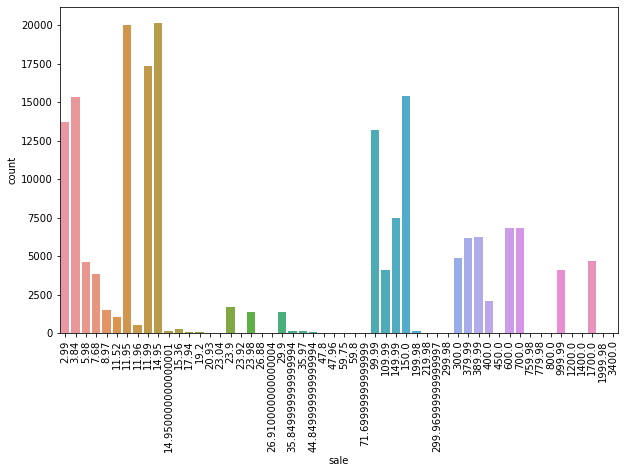

In [44]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
sns.countplot(x='sale',data=sales_df)

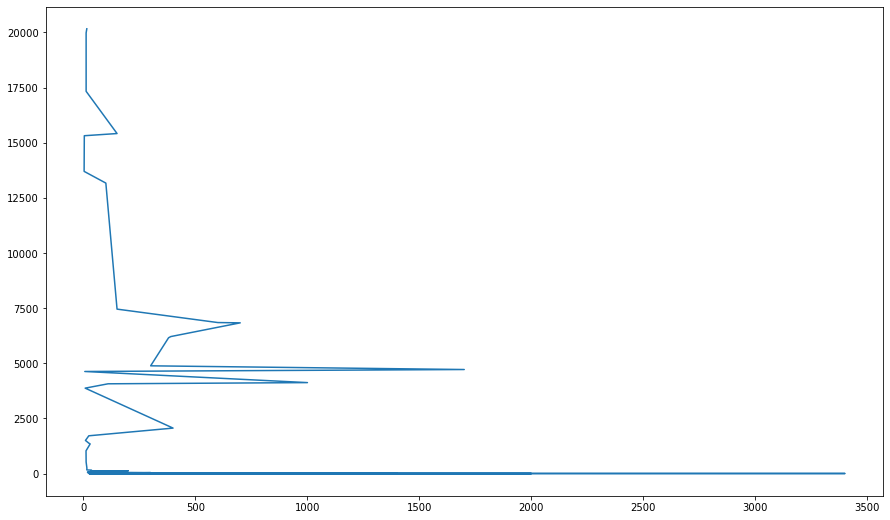

In [45]:
plt.figure(figsize=(15,9))
plt.plot(sales_df['sale'].value_counts())

<AxesSubplot:>

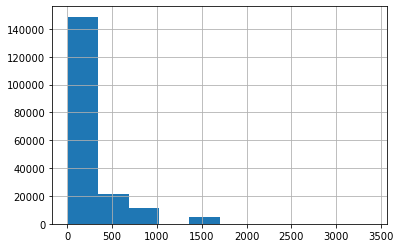

In [46]:
sales_df['sale'].hist()

<AxesSubplot:xlabel='Year,sale'>

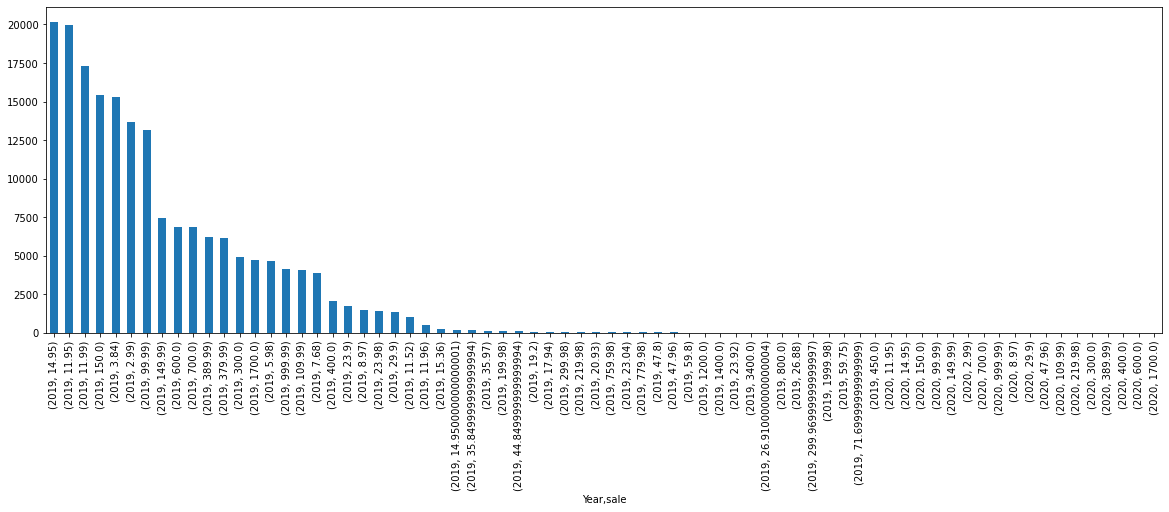

In [47]:
plt.figure(figsize=(20,6))
sales_df.groupby('Year')['sale'].value_counts().plot.bar()

<AxesSubplot:>

<Figure size 1440x432 with 0 Axes>

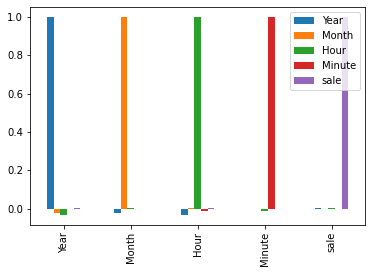

In [48]:

plt.figure(figsize=(20,6))
sales_df.corr().plot.bar()

In [49]:
sales_df.corr()

,Year,Month,Hour,Minute,sale
Year,1.000000,-0.023406,-0.032148,-0.001640,0.002820
Month,-0.023406,1.000000,0.001786,-0.002239,-0.003454
Hour,-0.032148,0.001786,1.000000,-0.015197,0.001683
Minute,-0.001640,-0.002239,-0.015197,1.000000,-0.002245
sale,0.002820,-0.003454,0.001683,-0.002245,1.000000


<AxesSubplot:>

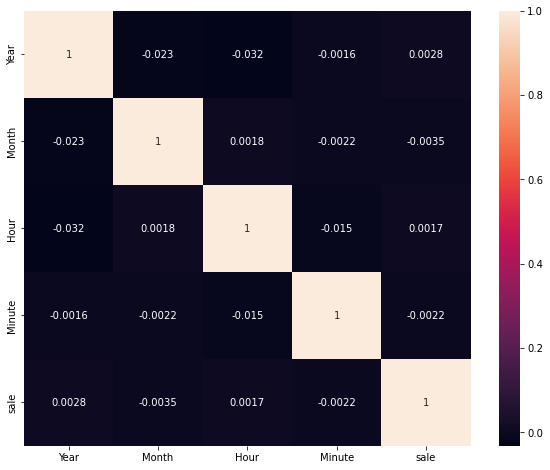

In [50]:
plt.figure(figsize=(10,8))
sns.heatmap(sales_df.corr(),annot=True)

In [51]:
from sklearn.preprocessing import LabelEncoder

In [52]:
le=LabelEncoder()

In [53]:
sales_df["Product"]= le.fit_transform(sales_df["Product"])

C:\Users\Admin\AppData\Local\Temp\ipykernel_16056\3501453953.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_df["Product"]= le.fit_transform(sales_df["Product"])


In [54]:
sales_df["Product"].unique()

array([17,  7, 18,  4,  3,  0, 13, 11,  2, 12,  6,  5, 15,  1, 14,  8,  9,
       16, 10])

In [55]:
X=sales_df.drop(['sale'],axis=1)
y=sales_df['sale']

In [56]:
X

,Product,Year,Month,Hour,Minute
0,17,2019,8,22,21
1,7,2019,8,15,11
2,18,2019,8,14,40
3,4,2019,8,20,59
4,4,2019,8,19,53
...,...,...,...,...,...
186845,12,2019,12,20,58
186846,4,2019,12,12,1
186847,16,2019,12,6,43
186848,17,2019,12,10,39


In [57]:
y

0          23.98
1          99.99
2         700.00
3           7.68
4           7.68
           ...  
186845     14.95
186846      7.68
186847    400.00
186848     11.99
186849     99.99
Name: sale, Length: 185686, dtype: float64

# MODEL BULIDING USING RANDOM FOREST REGRASSOR 

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [73]:
X.head()

,Product,Year,Month,Hour,Minute
0,17,2019,8,22,21
1,7,2019,8,15,11
2,18,2019,8,14,40
3,4,2019,8,20,59
4,4,2019,8,19,53


In [59]:
from sklearn.linear_model import Lasso 
from sklearn.feature_selection import SelectFromModel

In [60]:
from sklearn.ensemble import RandomForestRegressor

In [61]:
rf=RandomForestRegressor()

In [62]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [63]:
y_prd=rf.predict(X_test)

In [64]:
rf.score(X_train,y_train)

0.9994418918908626

In [65]:
rf.score(X_test,y_test)

0.9980013614664704

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


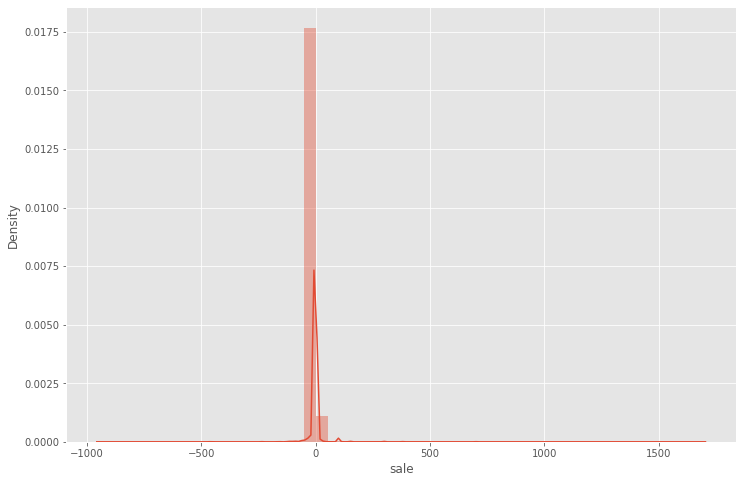

In [66]:
plt.style.use("ggplot")
plt.figure(figsize=(12,8))
sns.distplot(y_test-y_prd)
plt.show()

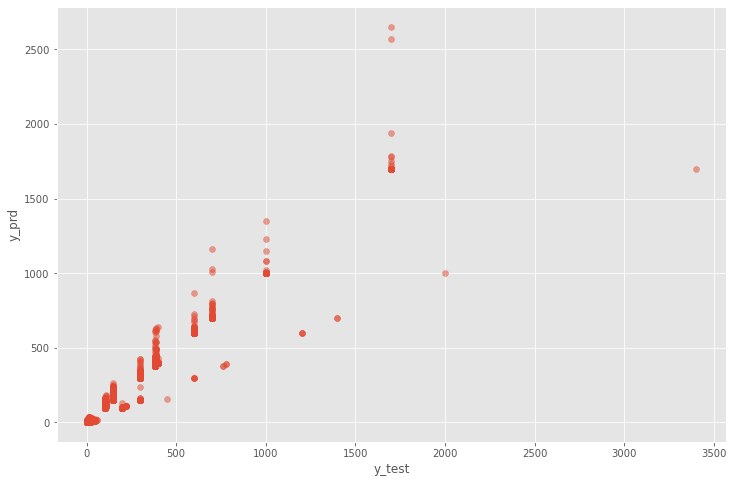

In [67]:
 plt.style.use("ggplot")
plt.figure(figsize=(12,8))
plt.scatter(y_test,y_prd,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_prd")
plt.show()

In [71]:

import pickle

pickle.dump(rf,open('sales_prediction.pkl','wb'))

In [72]:
pickle.dump(sales_df,open('sale_data.pkl','wb'))

In [74]:
rf.score(X_train,y_train)

0.9994418918908626

In [75]:
rf.score(X_test,y_test)

0.9980013614664704